In [1]:
from sympy import isprime, nextprime, primefactors

def prime_vortex(n, max_steps=1000):
    sequence = []
    for _ in range(max_steps):
        sequence.append(n)
        if n == 0:
            break
        if isprime(n):
            n = 2 * n + nextprime(n)
        else:
            factors = primefactors(n)
            k = factors[0] if factors else 1
            n = n // k
    return sequence

# Test with intriguing numbers
numbers = [7, 15, 23, 37, 49]
for num in numbers:
    print(f"{num}: {prime_vortex(num)}")


7: [7, 25, 5, 17, 53, 165, 55, 11, 35, 7, 25, 5, 17, 53, 165, 55, 11, 35, 7, 25, 5, 17, 53, 165, 55, 11, 35, 7, 25, 5, 17, 53, 165, 55, 11, 35, 7, 25, 5, 17, 53, 165, 55, 11, 35, 7, 25, 5, 17, 53, 165, 55, 11, 35, 7, 25, 5, 17, 53, 165, 55, 11, 35, 7, 25, 5, 17, 53, 165, 55, 11, 35, 7, 25, 5, 17, 53, 165, 55, 11, 35, 7, 25, 5, 17, 53, 165, 55, 11, 35, 7, 25, 5, 17, 53, 165, 55, 11, 35, 7, 25, 5, 17, 53, 165, 55, 11, 35, 7, 25, 5, 17, 53, 165, 55, 11, 35, 7, 25, 5, 17, 53, 165, 55, 11, 35, 7, 25, 5, 17, 53, 165, 55, 11, 35, 7, 25, 5, 17, 53, 165, 55, 11, 35, 7, 25, 5, 17, 53, 165, 55, 11, 35, 7, 25, 5, 17, 53, 165, 55, 11, 35, 7, 25, 5, 17, 53, 165, 55, 11, 35, 7, 25, 5, 17, 53, 165, 55, 11, 35, 7, 25, 5, 17, 53, 165, 55, 11, 35, 7, 25, 5, 17, 53, 165, 55, 11, 35, 7, 25, 5, 17, 53, 165, 55, 11, 35, 7, 25, 5, 17, 53, 165, 55, 11, 35, 7, 25, 5, 17, 53, 165, 55, 11, 35, 7, 25, 5, 17, 53, 165, 55, 11, 35, 7, 25, 5, 17, 53, 165, 55, 11, 35, 7, 25, 5, 17, 53, 165, 55, 11, 35, 7, 25, 5, 17, 53


Start: 7
Cycle detected (length 9): [7, 25, 5, 17, 53, 165, 55, 11, 35]
Cycle Analysis:
Number: 7, Prime: True, Parity: odd, Prime Factors: []
Number: 25, Prime: False, Parity: odd, Prime Factors: [5]
Number: 5, Prime: True, Parity: odd, Prime Factors: []
Number: 17, Prime: True, Parity: odd, Prime Factors: []
Number: 53, Prime: True, Parity: odd, Prime Factors: []
Number: 165, Prime: False, Parity: odd, Prime Factors: [3, 5, 11]
Number: 55, Prime: False, Parity: odd, Prime Factors: [5, 11]
Number: 11, Prime: True, Parity: odd, Prime Factors: []
Number: 35, Prime: False, Parity: odd, Prime Factors: [5, 7]
Total steps: 9

Start: 15
Cycle detected (length 9): [5, 17, 53, 165, 55, 11, 35, 7, 25]
Cycle Analysis:
Number: 5, Prime: True, Parity: odd, Prime Factors: []
Number: 17, Prime: True, Parity: odd, Prime Factors: []
Number: 53, Prime: True, Parity: odd, Prime Factors: []
Number: 165, Prime: False, Parity: odd, Prime Factors: [3, 5, 11]
Number: 55, Prime: False, Parity: odd, Prime Fac

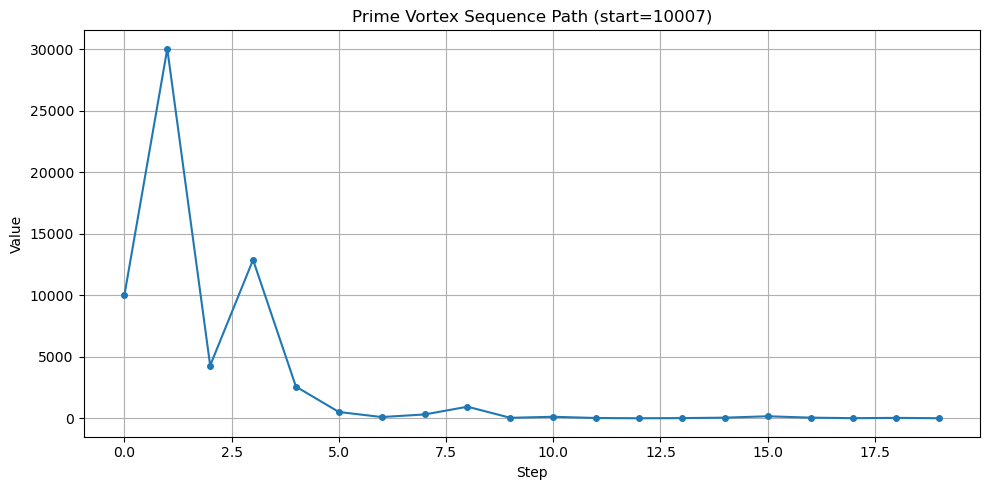

In [2]:
import matplotlib.pyplot as plt
from sympy import isprime, nextprime, primefactors

def prime_vortex(n, max_steps=1000):
    """
    Generate the Prime Vortex sequence for a starting integer n.
    Returns the full sequence and the detected cycle (if any).
    """
    seen = {}
    seq = []
    for i in range(max_steps):
        if n in seen:
            # Cycle detected
            cycle_start = seen[n]
            cycle = seq[cycle_start:]
            return seq, cycle
        seen[n] = i
        seq.append(n)
        if isprime(n):
            n = 2 * n + nextprime(n)
        else:
            factors = primefactors(n)
            n = n // factors[0] if factors else n
    return seq, None  # No cycle found within max_steps

def analyze_cycle(cycle):
    """
    Analyze the properties of a cycle: parity, primality, and prime factors.
    """
    analysis = []
    for n in cycle:
        analysis.append({
            "number": n,
            "is_prime": isprime(n),
            "parity": "odd" if n % 2 else "even",
            "prime_factors": primefactors(n) if not isprime(n) else []
        })
    return analysis

def print_cycle_analysis(analysis):
    print("Cycle Analysis:")
    for entry in analysis:
        print(
            f"Number: {entry['number']}, "
            f"Prime: {entry['is_prime']}, "
            f"Parity: {entry['parity']}, "
            f"Prime Factors: {entry['prime_factors']}"
        )

def plot_sequence(seq, title="Prime Vortex Sequence Path"):
    plt.figure(figsize=(10, 5))
    plt.plot(seq, marker='o', linestyle='-', markersize=4)
    plt.xlabel('Step')
    plt.ylabel('Value')
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Test numbers: small, large, primes, and composites
    test_numbers = [
        7, 15, 23, 37, 49,  # Small numbers
        101, 1009, 10007,   # Larger primes
        100, 1000, 10000,   # Larger composites
        nextprime(10**5), nextprime(10**6)
    ]

    for n in test_numbers:
        seq, cycle = prime_vortex(n, max_steps=2000)
        print(f"\nStart: {n}")
        if cycle:
            print(f"Cycle detected (length {len(cycle)}): {cycle}")
            analysis = analyze_cycle(cycle)
            print_cycle_analysis(analysis)
        else:
            print("No cycle detected within step limit (possible escapee).")
        print(f"Total steps: {len(seq)}")

    # Plot the sequence for a selected large starting value
    selected = 10007
    seq, cycle = prime_vortex(selected, max_steps=2000)
    plot_sequence(seq, title=f"Prime Vortex Sequence Path (start={selected})")


In [3]:
for n in [10**6 + 1, 10**7 + 3, 999983, 123456789]:
    seq, cycle = prime_vortex(n, max_steps=5000)
    print(f"Start: {n}")
    if cycle:
        print(f"Cycle detected (length {len(cycle)}): {cycle}")
    else:
        print("No cycle detected within step limit (possible escapee).")
    print(f"Total steps: {len(seq)}\n")


Start: 1000001
Cycle detected (length 9): [25, 5, 17, 53, 165, 55, 11, 35, 7]
Total steps: 23

Start: 10000003
Cycle detected (length 9): [7, 25, 5, 17, 53, 165, 55, 11, 35]
Total steps: 21

Start: 999983
Cycle detected (length 9): [53, 165, 55, 11, 35, 7, 25, 5, 17]
Total steps: 20

Start: 123456789
Cycle detected (length 9): [7, 25, 5, 17, 53, 165, 55, 11, 35]
Total steps: 20



In [1]:
from sympy import isprime, nextprime, primefactors

def prime_vortex(n, max_steps=10000):
    seen = {}
    seq = []
    for i in range(max_steps):
        if n in seen:
            cycle_start = seen[n]
            cycle = seq[cycle_start:]
            return seq, cycle
        seen[n] = i
        seq.append(n)
        if isprime(n):
            n = 2 * n + nextprime(n)
        else:
            factors = primefactors(n)
            n = n // factors[0] if factors else n
    return seq, None

# Test very large and special numbers
test_numbers = [
    10**8 + 1,
    99999989 * 99999959,  # product of two large primes
    12345678987654321,    # palindromic number
    600851475143,         # famous large composite
    10**12 + 39           # large random
]

for n in test_numbers:
    seq, cycle = prime_vortex(n)
    print(f"Start: {n}")
    if cycle:
        print(f"Cycle detected (length {len(cycle)}): {cycle}")
    else:
        print("No cycle detected within step limit.")
    print(f"Total steps: {len(seq)}\n")


Start: 100000001
Cycle detected (length 9): [11, 35, 7, 25, 5, 17, 53, 165, 55]
Total steps: 32

Start: 9999994800000451
Cycle detected (length 9): [17, 53, 165, 55, 11, 35, 7, 25, 5]
Total steps: 24

Start: 12345678987654321
Cycle detected (length 9): [25, 5, 17, 53, 165, 55, 11, 35, 7]
Total steps: 31

Start: 600851475143
Cycle detected (length 9): [7, 25, 5, 17, 53, 165, 55, 11, 35]
Total steps: 21

Start: 1000000000039
Cycle detected (length 9): [7, 25, 5, 17, 53, 165, 55, 11, 35]
Total steps: 37



In [2]:
from sympy import isprime, nextprime, primefactors, primerange
import time

def prime_vortex(n, max_steps=100000):
    seen = {}
    seq = []
    for i in range(max_steps):
        if n in seen:
            cycle_start = seen[n]
            cycle = seq[cycle_start:]
            return len(seq), cycle
        seen[n] = i
        seq.append(n)
        if isprime(n):
            n = 2 * n + nextprime(n)
        else:
            factors = primefactors(n)
            n = n // factors[0] if factors else n
    return len(seq), None  # No cycle found

# Generate some very large primes for products
large_primes = list(primerange(10**8, 10**8+10000))[:3] + \
               list(primerange(10**9, 10**9+10000))[:3] + \
               list(primerange(10**10, 10**10+10000))[:2]

test_numbers = [
    10**15 + 1,
    10**16 + 3,
    10**17 + 19,
    10**18 + 39,
    large_primes[0] * large_primes[1] * large_primes[2],
    large_primes[3] * large_primes[4] * large_primes[5],
    large_primes[6] * large_primes[7],
    large_primes[0] * large_primes[3] * large_primes[6],
    9999999967 * 9999999967 * 9999999967,  # cube of a large prime
    123456789123456789123456789,           # large palindromic-like
]

step_threshold = 50  # Flag anything that takes more than this many steps

summary = []
print(f"{'Start Value':>25} | {'Steps':>6} | {'Cycle Detected':>14} | {'Cycle (rotation)':>40}")
print("-"*95)
for n in test_numbers:
    t0 = time.time()
    steps, cycle = prime_vortex(n)
    elapsed = time.time() - t0
    cycle_str = str(cycle) if cycle else "None"
    flagged = " <-- Outlier" if steps > step_threshold else ""
    print(f"{n:>25} | {steps:>6} | {str(bool(cycle)):>14} | {cycle_str[:38]}{flagged}")
    summary.append((n, steps, bool(cycle), cycle, flagged, elapsed))

# Print any outliers separately for your paper
print("\nOutliers (steps > {}):".format(step_threshold))
for n, steps, detected, cycle, flagged, elapsed in summary:
    if steps > step_threshold:
        print(f"Start: {n}\n  Steps: {steps}\n  Cycle: {cycle}\n  Time: {elapsed:.2f}s\n")

# Optional: Save results to a file for your paper
with open("prime_vortex_large_test_results.txt", "w") as f:
    f.write(f"{'Start Value':>25} | {'Steps':>6} | {'Cycle Detected':>14} | {'Cycle (rotation)':>40}\n")
    f.write("-"*95 + "\n")
    for n, steps, detected, cycle, flagged, elapsed in summary:
        f.write(f"{n:>25} | {steps:>6} | {str(detected):>14} | {str(cycle)[:38]}{flagged}\n")
    f.write("\nOutliers (steps > {}):\n".format(step_threshold))
    for n, steps, detected, cycle, flagged, elapsed in summary:
        if steps > step_threshold:
            f.write(f"Start: {n}\n  Steps: {steps}\n  Cycle: {cycle}\n  Time: {elapsed:.2f}s\n")

print("Done. Results saved to 'prime_vortex_large_test_results.txt'.")


              Start Value |  Steps | Cycle Detected |                         Cycle (rotation)
-----------------------------------------------------------------------------------------------
         1000000000000001 |     26 |           True | [7, 25, 5, 17, 53, 165, 55, 11, 35]
        10000000000000003 |     24 |           True | [25, 5, 17, 53, 165, 55, 11, 35, 7]
       100000000000000019 |     27 |           True | [11, 35, 7, 25, 5, 17, 53, 165, 55]
      1000000000000000039 |     27 |           True | [25, 5, 17, 53, 165, 55, 11, 35, 7]
1000000830000197500010101 |     24 |           True | [25, 5, 17, 53, 165, 55, 11, 35, 7]


1000000037000000399000001323 |     28 |           True | [55, 11, 35, 7, 25, 5, 17, 53, 165]
    100000000520000000627 |     23 |           True | [11, 35, 7, 25, 5, 17, 53, 165, 55]


1000000078900000636300000931 |     26 |           True | [7, 25, 5, 17, 53, 165, 55, 11, 35]
999999990100000032669999964063 |     30 |           True | [7, 25, 5, 17, 53, 165, 55, 11, 35]
123456789123456789123456789 |     41 |           True | [55, 11, 35, 7, 25, 5, 17, 53, 165]

Outliers (steps > 50):
Done. Results saved to 'prime_vortex_large_test_results.txt'.


In [3]:
from sympy import isprime, nextprime, primefactors

def prime_vortex(n, max_steps=100000):
    seen = {}
    seq = []
    for i in range(max_steps):
        if n in seen:
            cycle_start = seen[n]
            cycle = seq[cycle_start:]
            return seq, cycle
        seen[n] = i
        seq.append(n)
        if isprime(n):
            n = 2 * n + nextprime(n)
        else:
            factors = primefactors(n)
            n = n // factors[0] if factors else n
    return seq, None

def format_large(n):
    return f"{n:,}"

# Prepare very large numbers and products of large primes
large_primes = [9999999967, 9999999961, 9999999943]
test_numbers = [
    10**15 + 123,  # Large number
    10**18 + 321,  # Even larger number
    large_primes[0] * large_primes[1],  # Product of two large primes
    large_primes[0] * large_primes[1] * large_primes[2],  # Product of three large primes
    9999999967 * 999983 * 9973,  # Mix of large and medium primes
]

outlier_threshold = 50  # Steps to cycle above this are flagged as outliers

for n in test_numbers:
    print(f"\nTesting start value: {format_large(n)}")
    seq, cycle = prime_vortex(n)
    if cycle:
        steps = len(seq)
        print(f"Cycle detected (length {len(cycle)}): {cycle}")
        print(f"Total steps to cycle: {steps}")
        if steps > outlier_threshold:
            print("** Outlier: unusually many steps to cycle! **")
            print("First 10 steps:", seq[:10])
            print("Last 10 steps before cycle:", seq[-10:])
    else:
        print("No cycle detected within step limit.")
        print("Last 10 values:", seq[-10:])



Testing start value: 1,000,000,000,000,123
Cycle detected (length 9): [11, 35, 7, 25, 5, 17, 53, 165, 55]
Total steps to cycle: 27

Testing start value: 1,000,000,000,000,000,321
Cycle detected (length 9): [7, 25, 5, 17, 53, 165, 55, 11, 35]
Total steps to cycle: 31

Testing start value: 99,999,999,280,000,001,287
Cycle detected (length 9): [7, 25, 5, 17, 53, 165, 55, 11, 35]
Total steps to cycle: 31

Testing start value: 999,999,987,100,000,053,909,999,926,641


Cycle detected (length 9): [7, 25, 5, 17, 53, 165, 55, 11, 35]
Total steps to cycle: 32

Testing start value: 99,728,304,260,896,594,853
Cycle detected (length 9): [7, 25, 5, 17, 53, 165, 55, 11, 35]
Total steps to cycle: 30



1. Rigorous Proof/Disproof: Prime-Growth Step Exploration
=== Prime-Growth Step Exploration ===
Chain broken at step 1: 3000039 is composite.

2. Cycle Classification (N=1000)
=== Cycle Classification ===
Number of distinct cycles found: 1
Cycle: (5, 7, 11, 17, 25, 35, 53, 55, 165)

3. Generalizations (3n + nextprime(n), N=500)
=== Generalization: 3n + nextprime(n) for primes ===
=== Cycle Classification ===
Number of distinct cycles found: 1
Cycle: (2, 3, 4, 7, 8, 9, 14, 16, 32)

4. Statistical Properties (N=1000)
=== Statistical Properties: Steps to Cycle ===


/tmp/ipykernel_470/1824458069.py:100: DeprecationWarning: sage.stats.basic_stats.mean is deprecated; use numpy.mean or numpy.nanmean instead
See https://github.com/sagemath/sage/issues/29662 for details.
  print(f"Average steps to cycle: {float(mean(steps)):.2f}")


Average steps to cycle: 6.20
Max steps to cycle: 25
Min steps to cycle: 0


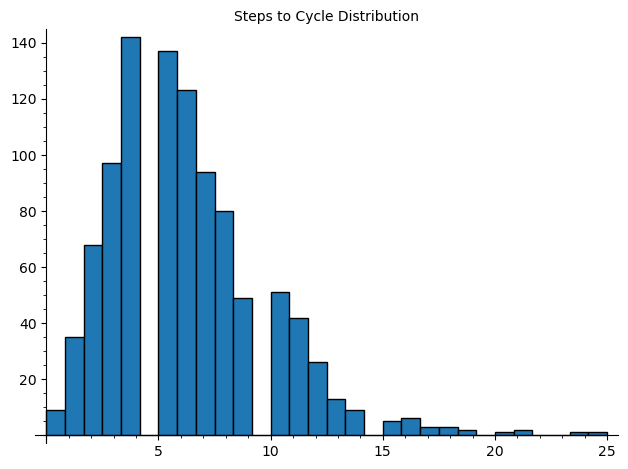


5. Compare to Collatz (n0=27)
=== Compare to Collatz Conjecture ===
Start: 27 | Prime Vortex steps: 12 | Collatz steps: 112


In [7]:
# SageMath Script: Prime Vortex Sequence - Automatic Research Toolkit (Robust Version)

def nextprime_sage(n):
    n = Integer(n)
    return next_prime(n)

def spf(n):
    n = Integer(n)
    if n == 1:
        return 1  # Avoids empty list error; will keep n=1 fixed
    return n.prime_factors()[0]

def is_prime_sage(n):
    n = Integer(n)
    return is_prime(n)

def prime_vortex_step(n, a=2, rule_variant=None):
    n = Integer(n)
    if n == 1:
        return 1  # Stay at 1 if reached
    if rule_variant is not None:
        return rule_variant(n)
    if is_prime_sage(n):
        return a*n + nextprime_sage(n)
    else:
        return n // spf(n)

def prime_vortex_sequence(n0, max_steps=1000, a=2, rule_variant=None):
    seen = {}
    seq = []
    n = Integer(n0)
    for i in range(max_steps):
        if n in seen:
            cycle_start = seen[n]
            cycle = seq[cycle_start:]
            return seq, cycle
        if n == 1:
            seq.append(n)
            return seq, [1]
        seen[n] = i
        seq.append(n)
        n = prime_vortex_step(n, a=a, rule_variant=rule_variant)
    return seq, None

# --- 1. Rigorous Proof/Disproof: Prime-Growth Step Exploration ---

def test_prime_growth_chain(p0, max_steps=1000, a=2):
    print("=== Prime-Growth Step Exploration ===")
    n = Integer(p0)
    for i in range(max_steps):
        if not is_prime_sage(n):
            print(f"Chain broken at step {i}: {n} is composite.")
            return False
        n_next = a*n + nextprime_sage(n)
        if n_next <= n:
            print(f"Chain stopped growing at step {i}: {n_next} <= {n}.")
            return False
        n = n_next
    print(f"Chain of primes persisted for {max_steps} steps (very unlikely).")
    return True

# --- 2. Cycle Classification ---

def search_for_cycles(N=1000, a=2, rule_variant=None):
    print("=== Cycle Classification ===")
    found_cycles = set()
    for n in range(1, N+1):
        seq, cycle = prime_vortex_sequence(n, a=a, rule_variant=rule_variant)
        # Only consider nontrivial cycles (not just [1])
        if cycle and set(cycle) != set([1]):
            found_cycles.add(tuple(sorted(cycle)))
    print(f"Number of distinct cycles found: {len(found_cycles)}")
    for cyc in found_cycles:
        print("Cycle:", cyc)

# --- 3. Generalizations ---

def custom_rule(n):
    n = Integer(n)
    # Example: Replace 2n with 3n in the prime step
    if is_prime_sage(n):
        return 3*n + nextprime_sage(n)
    else:
        return n // spf(n)

def search_for_cycles_generalized(N=500):
    print("=== Generalization: 3n + nextprime(n) for primes ===")
    search_for_cycles(N=N, rule_variant=custom_rule)

# --- 4. Statistical Properties ---

def stats_steps_to_cycle(N=1000, a=2, rule_variant=None):
    print("=== Statistical Properties: Steps to Cycle ===")
    steps = []
    for n in range(1, N+1):
        seq, cycle = prime_vortex_sequence(n, a=a, rule_variant=rule_variant)
        if cycle and set(cycle) != set([1]):
            steps.append(len(seq) - len(cycle))
    if steps:
        print(f"Average steps to cycle: {float(mean(steps)):.2f}")
        print(f"Max steps to cycle: {max(steps)}")
        print(f"Min steps to cycle: {min(steps)}")
        histogram(steps, bins=30, title="Steps to Cycle Distribution").show()
    else:
        print("No nontrivial cycles detected in the tested range.")

# --- 5. Connections to Other Problems ---

def collatz_step(n):
    n = Integer(n)
    if n % 2 == 0:
        return n // 2
    else:
        return 3*n + 1

def compare_to_collatz(n0, max_steps=1000):
    print("=== Compare to Collatz Conjecture ===")
    seq_vortex, _ = prime_vortex_sequence(n0, max_steps=max_steps)
    n = Integer(n0)
    collatz_seq = []
    for i in range(max_steps):
        collatz_seq.append(n)
        if n == 1:
            break
        n = collatz_step(n)
    print(f"Start: {n0} | Prime Vortex steps: {len(seq_vortex)} | Collatz steps: {len(collatz_seq)}")

# --- Automatic Calls for All Analyses ---

print("\n1. Rigorous Proof/Disproof: Prime-Growth Step Exploration")
test_prime_growth_chain(next_prime(10^6), max_steps=100)

print("\n2. Cycle Classification (N=1000)")
search_for_cycles(N=1000)

print("\n3. Generalizations (3n + nextprime(n), N=500)")
search_for_cycles_generalized(N=500)

print("\n4. Statistical Properties (N=1000)")
stats_steps_to_cycle(N=1000)

print("\n5. Compare to Collatz (n0=27)")
compare_to_collatz(27)

In [1]:
from sage.all import Integer, next_prime, is_prime
import pickle
from tqdm.notebook import tqdm  # Or from tqdm import tqdm if not using Jupyter
import multiprocessing

def nextprime_sage(n):
    n = Integer(n)
    return next_prime(n)

def spf(n):
    n = Integer(n)
    if n == 1:
        return 1
    return n.prime_factors()[0]

def is_prime_sage(n):
    n = Integer(n)
    return is_prime(n)

def prime_vortex_step(n, a=2, rule_variant=None):
    n = Integer(n)
    if n == 1:
        return 1
    if rule_variant is not None:
        return rule_variant(n)
    if is_prime_sage(n):
        return a*n + nextprime_sage(n)
    else:
        return n // spf(n)

def prime_vortex_sequence(n0, max_steps=1000, a=2, rule_variant=None):
    seen = {}
    seq = []
    n = Integer(n0)
    for i in range(max_steps):
        if n in seen:
            cycle_start = seen[n]
            cycle = seq[cycle_start:]
            return seq, cycle
        if n == 1:
            seq.append(n)
            return seq, [1]
        seen[n] = i
        seq.append(n)
        n = prime_vortex_step(n, a=a, rule_variant=rule_variant)
    return seq, None

def search_for_cycles(N=2000, a=2, rule_variant=None, print_cycles=True, savefile=None, parallel=False):
    found_cycles = set()
    all_cycles = []
    results = []
    # Progress bar setup
    iterator = tqdm(range(1, N+1), desc=f"Searching cycles (a={a}, N={N})")
    
    def process_one(n):
        seq, cycle = prime_vortex_sequence(n, a=a, rule_variant=rule_variant)
        if cycle and set(cycle) != set([1]):
            cyc = tuple(sorted(cycle))
            return cyc
        return None

    if parallel:
        # Use multiprocessing to speed up
        with multiprocessing.Pool() as pool:
            for cyc in pool.imap(process_one, range(1, N+1)):
                if cyc and cyc not in found_cycles:
                    found_cycles.add(cyc)
                    all_cycles.append(cyc)
    else:
        for n in iterator:
            cyc = process_one(n)
            if cyc and cyc not in found_cycles:
                found_cycles.add(cyc)
                all_cycles.append(cyc)
    if print_cycles:
        print(f"Number of distinct cycles found for a = {a}, N = {N}: {len(found_cycles)}")
        for cyc in all_cycles:
            print("Cycle:", cyc)
    if savefile:
        with open(savefile, 'wb') as f:
            pickle.dump(all_cycles, f)
    return all_cycles

# --- Generalizations: Custom Prime Step Functions ---

def custom_rule_double_nextprime(n):
    n = Integer(n)
    if is_prime_sage(n):
        return 2*n + 2*nextprime_sage(n)
    else:
        return n // spf(n)

def custom_rule_square(n):
    n = Integer(n)
    if is_prime_sage(n):
        return n^2 + nextprime_sage(n)
    else:
        return n // spf(n)

# --- Table Output for Paper ---

def print_cycle_table(cycle_dict):
    print("| Rule | N | # Cycles | Example Cycle(s) |")
    print("|------|----|----------|------------------|")
    for rule, (N, cycles) in cycle_dict.items():
        ex = ", ".join(str(c[:8]) + ("..." if len(c) > 8 else "") for c in cycles[:2])
        print(f"| {rule} | {N} | {len(cycles)} | {ex} |")

# --- Main Exploration ---

N = 2000  # You can increase this for more thorough exploration

cycle_dict = {}

# Explore a = 2, 3, 4, 5, 6
for a in range(2, 7):
    print(f"\n=== Cycle Classification for a = {a}, N = {N} ===")
    cycles = search_for_cycles(N=N, a=a, savefile=f"cycles_a{a}_N{N}.pkl", print_cycles=True)
    cycle_dict[f"{a}n+nextprime(n)"] = (N, cycles)

# Custom rules
print("\n=== Cycle Classification for 2n + 2*nextprime(n) (primes), N = 1000 ===")
cycles = search_for_cycles(N=1000, rule_variant=custom_rule_double_nextprime, savefile="cycles_2n+2nextprime_N1000.pkl")
cycle_dict["2n+2nextprime(n)"] = (1000, cycles)

print("\n=== Cycle Classification for n^2 + nextprime(n) (primes), N = 100 ===")
cycles = search_for_cycles(N=100, rule_variant=custom_rule_square, savefile="cycles_n2+nextprime_N100.pkl")
cycle_dict["n^2+nextprime(n)"] = (100, cycles)

# Large N example (no cycle printing for speed)
print("\n=== Cycle Classification for a = 2, N = 10000 (Larger N) ===")
cycles = search_for_cycles(N=10000, a=2, print_cycles=False, savefile="cycles_a2_N10000.pkl")
cycle_dict["2n+nextprime(n), large N"] = (10000, cycles)

# Print summary table
print("\n=== Summary Table for Paper ===")
print_cycle_table(cycle_dict)



=== Cycle Classification for a = 2, N = 2000 ===


Searching cycles (a=2, N=2000):   0%|          | 0/2000 [00:00<?, ?it/s]

Number of distinct cycles found for a = 2, N = 2000: 1
Cycle: (5, 7, 11, 17, 25, 35, 53, 55, 165)

=== Cycle Classification for a = 3, N = 2000 ===


Searching cycles (a=3, N=2000):   0%|          | 0/2000 [00:00<?, ?it/s]

Number of distinct cycles found for a = 3, N = 2000: 1
Cycle: (2, 3, 4, 7, 8, 9, 14, 16, 32)

=== Cycle Classification for a = 4, N = 2000 ===


Searching cycles (a=4, N=2000):   0%|          | 0/2000 [00:00<?, ?it/s]

Number of distinct cycles found for a = 4, N = 2000: 1
Cycle: (11, 19, 33, 57, 99)

=== Cycle Classification for a = 5, N = 2000 ===


Searching cycles (a=5, N=2000):   0%|          | 0/2000 [00:00<?, ?it/s]

Number of distinct cycles found for a = 5, N = 2000: 1
Cycle: (2, 3, 4, 5, 6, 8, 10, 12, 13, 16, 20, 24, 31, 32, 41, 48, 62, 82, 96, 124, 192, 248)

=== Cycle Classification for a = 6, N = 2000 ===


Searching cycles (a=6, N=2000):   0%|          | 0/2000 [00:00<?, ?it/s]

Number of distinct cycles found for a = 6, N = 2000: 4
Cycle: (19, 31, 137, 181, 223, 257, 313, 361, 439, 961, 1277, 1565, 1805, 2195, 3077, 7967, 8941, 62597, 87637, 438185)
Cycle: (11, 17, 29, 41, 71, 79, 121, 205, 269, 289, 377, 499, 557, 781, 1885, 3497, 3905)
Cycle: (83, 139, 587, 823, 983, 1153, 4115, 5143, 5765, 6889, 8081, 56573)
Cycle: (1423, 1993, 2791, 9965, 13955, 19543, 136811, 957679)

=== Cycle Classification for 2n + 2*nextprime(n) (primes), N = 1000 ===


Searching cycles (a=2, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]

Number of distinct cycles found for a = 2, N = 1000: 1
Cycle: (2, 3, 4, 5, 6, 8, 10, 12, 16, 24)

=== Cycle Classification for n^2 + nextprime(n) (primes), N = 100 ===


Searching cycles (a=2, N=100):   0%|          | 0/100 [00:00<?, ?it/s]

In [3]:
for a in range(7, 21):
    print(f"\n=== Cycle Classification for a = {a}, N = 1000 ===")
    cycles = search_for_cycles(N=1000, a=a, print_cycles=False, savefile=f"cycles_a{a}_N1000.pkl")
    print(f"Number of distinct cycles for a={a}: {len(cycles)}")
    print("Cycle lengths:", [len(c) for c in cycles])



=== Cycle Classification for a = 7, N = 1000 ===


Searching cycles (a=7, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]

Number of distinct cycles for a=7: 2
Cycle lengths: [7, 7]

=== Cycle Classification for a = 8, N = 1000 ===


Searching cycles (a=8, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]

Number of distinct cycles for a=8: 1
Cycle lengths: [7]

=== Cycle Classification for a = 9, N = 1000 ===


Searching cycles (a=9, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]

Number of distinct cycles for a=9: 1
Cycle lengths: [9]

=== Cycle Classification for a = 10, N = 1000 ===


Searching cycles (a=10, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]

Number of distinct cycles for a=10: 2
Cycle lengths: [36, 6]

=== Cycle Classification for a = 11, N = 1000 ===


Searching cycles (a=11, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]

Number of distinct cycles for a=11: 1
Cycle lengths: [27]

=== Cycle Classification for a = 12, N = 1000 ===


Searching cycles (a=12, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]

Number of distinct cycles for a=12: 2
Cycle lengths: [16, 8]

=== Cycle Classification for a = 13, N = 1000 ===


Searching cycles (a=13, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]

Number of distinct cycles for a=13: 1
Cycle lengths: [12]

=== Cycle Classification for a = 14, N = 1000 ===


Searching cycles (a=14, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]

Number of distinct cycles for a=14: 3
Cycle lengths: [20, 9, 11]

=== Cycle Classification for a = 15, N = 1000 ===


Searching cycles (a=15, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]

Number of distinct cycles for a=15: 2
Cycle lengths: [9, 12]

=== Cycle Classification for a = 16, N = 1000 ===


Searching cycles (a=16, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]

Number of distinct cycles for a=16: 1
Cycle lengths: [22]

=== Cycle Classification for a = 17, N = 1000 ===


Searching cycles (a=17, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]

Number of distinct cycles for a=17: 1
Cycle lengths: [23]

=== Cycle Classification for a = 18, N = 1000 ===


Searching cycles (a=18, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]

Number of distinct cycles for a=18: 1
Cycle lengths: [48]

=== Cycle Classification for a = 19, N = 1000 ===


Searching cycles (a=19, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]

Number of distinct cycles for a=19: 2
Cycle lengths: [21, 22]

=== Cycle Classification for a = 20, N = 1000 ===


Searching cycles (a=20, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]

Number of distinct cycles for a=20: 4
Cycle lengths: [26, 10, 17, 11]



=== Cycle Classification for a = 2, N = 1000 ===


Searching cycles (a=2, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]


=== Cycle Classification for a = 3, N = 1000 ===


Searching cycles (a=3, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]


=== Cycle Classification for a = 4, N = 1000 ===


Searching cycles (a=4, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]


=== Cycle Classification for a = 5, N = 1000 ===


Searching cycles (a=5, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]


=== Cycle Classification for a = 6, N = 1000 ===


Searching cycles (a=6, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]


=== Cycle Classification for a = 7, N = 1000 ===


Searching cycles (a=7, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]


=== Cycle Classification for a = 8, N = 1000 ===


Searching cycles (a=8, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]


=== Cycle Classification for a = 9, N = 1000 ===


Searching cycles (a=9, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]


=== Cycle Classification for a = 10, N = 1000 ===


Searching cycles (a=10, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]


=== Cycle Classification for a = 11, N = 1000 ===


Searching cycles (a=11, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]


=== Cycle Classification for a = 12, N = 1000 ===


Searching cycles (a=12, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]


=== Cycle Classification for a = 13, N = 1000 ===


Searching cycles (a=13, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]


=== Cycle Classification for a = 14, N = 1000 ===


Searching cycles (a=14, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]


=== Cycle Classification for a = 15, N = 1000 ===


Searching cycles (a=15, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]


=== Cycle Classification for a = 16, N = 1000 ===


Searching cycles (a=16, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]


=== Cycle Classification for a = 17, N = 1000 ===


Searching cycles (a=17, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]


=== Cycle Classification for a = 18, N = 1000 ===


Searching cycles (a=18, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]


=== Cycle Classification for a = 19, N = 1000 ===


Searching cycles (a=19, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]


=== Cycle Classification for a = 20, N = 1000 ===


Searching cycles (a=20, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]


=== Cycle Classification for a = 21, N = 1000 ===


Searching cycles (a=21, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]


=== Cycle Classification for a = 22, N = 1000 ===


Searching cycles (a=22, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]


=== Cycle Classification for a = 23, N = 1000 ===


Searching cycles (a=23, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]


=== Cycle Classification for a = 24, N = 1000 ===


Searching cycles (a=24, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]


=== Cycle Classification for a = 25, N = 1000 ===


Searching cycles (a=25, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]


=== Cycle Classification for a = 26, N = 1000 ===


Searching cycles (a=26, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]


=== Cycle Classification for a = 27, N = 1000 ===


Searching cycles (a=27, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]


=== Cycle Classification for a = 28, N = 1000 ===


Searching cycles (a=28, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]


=== Cycle Classification for a = 29, N = 1000 ===


Searching cycles (a=29, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]


=== Cycle Classification for a = 30, N = 1000 ===


Searching cycles (a=30, N=1000):   0%|          | 0/1000 [00:00<?, ?it/s]


=== Summary Table ===
| a | N | # Cycles | Max Cycle Length | Example Cycle Lengths |
|---|----|----------|------------------|----------------------|
| 2 | 1000 | 1 | 9 | 9 |
| 3 | 1000 | 1 | 9 | 9 |
| 4 | 1000 | 1 | 5 | 5 |
| 5 | 1000 | 1 | 22 | 22 |
| 6 | 1000 | 3 | 20 | 20, 17, 12 |
| 7 | 1000 | 2 | 7 | 7, 7 |
| 8 | 1000 | 1 | 7 | 7 |
| 9 | 1000 | 1 | 9 | 9 |
| 10 | 1000 | 2 | 36 | 36, 6 |
| 11 | 1000 | 1 | 27 | 27 |
| 12 | 1000 | 2 | 16 | 16, 8 |
| 13 | 1000 | 1 | 12 | 12 |
| 14 | 1000 | 3 | 20 | 20, 9, 11 |
| 15 | 1000 | 2 | 12 | 9, 12 |
| 16 | 1000 | 1 | 22 | 22 |
| 17 | 1000 | 1 | 23 | 23 |
| 18 | 1000 | 1 | 48 | 48 |
| 19 | 1000 | 2 | 22 | 21, 22 |
| 20 | 1000 | 4 | 26 | 26, 10, 17... |
| 21 | 1000 | 1 | 47 | 47 |
| 22 | 1000 | 5 | 28 | 28, 24, 13... |
| 23 | 1000 | 1 | 79 | 79 |
| 24 | 1000 | 3 | 13 | 13, 4, 7 |
| 25 | 1000 | 3 | 37 | 37, 16, 13 |
| 26 | 1000 | 3 | 28 | 26, 28, 22 |
| 27 | 1000 | 2 | 34 | 34, 9 |
| 28 | 1000 | 2 | 75 | 75, 9 |
| 29 | 1000 | 3 | 69 | 16, 69, 2

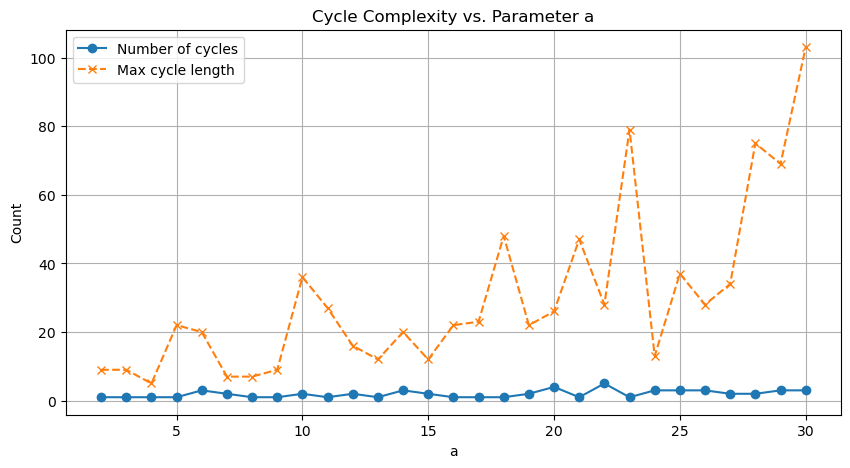


--- Cycle Structure Analysis for a=2 ---
Cycle 1: Length=9, Primes=5, Composites=4
Residues mod 2: [1, 1, 1, 1, 1, 1, 1, 1, 1]
Residues mod 3: [2, 1, 2, 2, 1, 2, 2, 1, 0]
Residues mod 5: [0, 2, 1, 2, 0, 0, 3, 0, 0]


--- Cycle Structure Analysis for a=6 ---
Cycle 1: Length=20, Primes=11, Composites=9
Residues mod 2: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Residues mod 3: [1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2]
Residues mod 5: [4, 1, 2, 1, 3, 2, 3, 1, 4, 1, 2, 0, 0, 0, 2, 2, 1, 2, 2, 0]

Cycle 2: Length=17, Primes=9, Composites=8
Residues mod 2: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Residues mod 3: [2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2]
Residues mod 5: [1, 2, 4, 1, 1, 4, 1, 0, 4, 4, 2, 4, 2, 1, 0, 2, 0]

Cycle 3: Length=12, Primes=7, Composites=5
Residues mod 2: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Residues mod 3: [2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2]
Residues mod 5: [3, 4, 2, 3, 3, 3, 0, 3, 0, 4, 1, 3]


--- Cycle Str

In [4]:
from sage.all import Integer, next_prime, is_prime
import pickle
from tqdm.notebook import tqdm  # Use 'from tqdm import tqdm' if not in Jupyter
import matplotlib.pyplot as plt

def nextprime_sage(n):
    n = Integer(n)
    return next_prime(n)

def spf(n):
    n = Integer(n)
    if n == 1:
        return 1
    return n.prime_factors()[0]

def is_prime_sage(n):
    n = Integer(n)
    return is_prime(n)

def prime_vortex_step(n, a=2, rule_variant=None):
    n = Integer(n)
    if n == 1:
        return 1
    if rule_variant is not None:
        return rule_variant(n)
    if is_prime_sage(n):
        return a*n + nextprime_sage(n)
    else:
        return n // spf(n)

def prime_vortex_sequence(n0, max_steps=1000, a=2, rule_variant=None):
    seen = {}
    seq = []
    n = Integer(n0)
    for i in range(max_steps):
        if n in seen:
            cycle_start = seen[n]
            cycle = seq[cycle_start:]
            return seq, cycle
        if n == 1:
            seq.append(n)
            return seq, [1]
        seen[n] = i
        seq.append(n)
        n = prime_vortex_step(n, a=a, rule_variant=rule_variant)
    return seq, None

def search_for_cycles(N=1000, a=2, rule_variant=None, print_cycles=False, savefile=None):
    found_cycles = set()
    all_cycles = []
    iterator = tqdm(range(1, N+1), desc=f"Searching cycles (a={a}, N={N})")
    for n in iterator:
        seq, cycle = prime_vortex_sequence(n, a=a, rule_variant=rule_variant)
        if cycle and set(cycle) != set([1]):
            cyc = tuple(sorted(cycle))
            if cyc not in found_cycles:
                found_cycles.add(cyc)
                all_cycles.append(cyc)
    if print_cycles:
        print(f"Number of distinct cycles found for a = {a}, N = {N}: {len(found_cycles)}")
        for cyc in all_cycles:
            print("Cycle:", cyc)
    if savefile:
        with open(savefile, 'wb') as f:
            pickle.dump(all_cycles, f)
    return all_cycles

def analyze_cycle_structure(cycles):
    analysis = []
    for cyc in cycles:
        primes = sum(1 for n in cyc if is_prime_sage(n))
        composites = len(cyc) - primes
        residues_mod_2 = [n % 2 for n in cyc]
        residues_mod_3 = [n % 3 for n in cyc]
        residues_mod_5 = [n % 5 for n in cyc]
        analysis.append({
            'length': len(cyc),
            'primes': primes,
            'composites': composites,
            'mod2': residues_mod_2,
            'mod3': residues_mod_3,
            'mod5': residues_mod_5,
            'cycle': cyc
        })
    return analysis

def print_cycle_table(cycle_data):
    print("| a | N | # Cycles | Max Cycle Length | Example Cycle Lengths |")
    print("|---|----|----------|------------------|----------------------|")
    for a, (N, cycles) in cycle_data.items():
        lens = [len(c) for c in cycles]
        lens_str = ", ".join(str(l) for l in lens[:3]) + ("..." if len(lens) > 3 else "")
        print(f"| {a} | {N} | {len(cycles)} | {max(lens) if lens else 0} | {lens_str} |")

def plot_cycle_stats(a_values, num_cycles, max_cycle_lengths):
    plt.figure(figsize=(10,5))
    plt.plot(a_values, num_cycles, marker='o', label='Number of cycles')
    plt.plot(a_values, max_cycle_lengths, marker='x', label='Max cycle length', linestyle='--')
    plt.xlabel('a')
    plt.ylabel('Count')
    plt.title('Cycle Complexity vs. Parameter a')
    plt.legend()
    plt.grid(True)
    plt.show()

# --- Main Exploration ---

N = 1000  # You can increase as resources allow
a_min = 2
a_max = 30

cycle_data = {}
a_values = []
num_cycles = []
max_cycle_lengths = []

for a in range(a_min, a_max+1):
    print(f"\n=== Cycle Classification for a = {a}, N = {N} ===")
    cycles = search_for_cycles(N=N, a=a, print_cycles=False, savefile=f"cycles_a{a}_N{N}.pkl")
    cycle_data[a] = (N, cycles)
    a_values.append(a)
    num_cycles.append(len(cycles))
    max_cycle_lengths.append(max([len(c) for c in cycles]) if cycles else 0)

# Print summary table
print("\n=== Summary Table ===")
print_cycle_table(cycle_data)

# Plot number of cycles and max cycle length vs. a
plot_cycle_stats(a_values, num_cycles, max_cycle_lengths)

# --- Analyze structure of cycles for a few interesting cases ---
for a in [2, 6, 10, 20, 30]:
    if a in cycle_data:
        print(f"\n--- Cycle Structure Analysis for a={a} ---")
        N, cycles = cycle_data[a]
        analysis = analyze_cycle_structure(cycles)
        for i, info in enumerate(analysis):
            print(f"Cycle {i+1}: Length={info['length']}, Primes={info['primes']}, Composites={info['composites']}")
            print(f"Residues mod 2: {info['mod2']}")
            print(f"Residues mod 3: {info['mod3']}")
            print(f"Residues mod 5: {info['mod5']}")
            print()


In [1]:
from sage.all import Integer, next_prime, is_prime

def nextprime_sage(n):
    n = Integer(n)
    return next_prime(n)

def spf(n):
    n = Integer(n)
    if n == 1:
        return 1
    return n.prime_factors()[0]

def is_prime_sage(n):
    n = Integer(n)
    return is_prime(n)

def prime_vortex_step(n, a=2):
    n = Integer(n)
    if n == 1:
        return 1
    if is_prime_sage(n):
        return a*n + nextprime_sage(n)
    else:
        return n // spf(n)

def find_cycles(N=1000, a=6, max_steps=1000):
    # Map from starting value to (cycle tuple, entry index)
    visited = {}
    cycles = {}
    for n0 in range(1, N+1):
        n = Integer(n0)
        seq = []
        seen = {}
        for i in range(max_steps):
            if n in seen:
                # Cycle detected
                cycle_start = seen[n]
                cycle = tuple(seq[cycle_start:])
                cycles[cycle] = cycles.get(cycle, []) + [n0]
                break
            if n in visited:
                # Already known to enter a cycle
                break
            seen[n] = i
            seq.append(n)
            n = prime_vortex_step(n, a=a)
        for m in seq:
            visited[m] = True
    return cycles

def verify_cycle_closed(cycle, a=6):
    # Check that each element maps to another in the cycle
    cycle_set = set(cycle)
    for n in cycle:
        nxt = prime_vortex_step(n, a=a)
        if nxt not in cycle_set:
            return False
    return True

def main_proof_script(a=6, N=1000):
    print(f"Searching for cycles for a={a}, N={N}...")
    cycles = find_cycles(N=N, a=a)
    print(f"Number of distinct cycles found: {len(cycles)}")
    # Identify the largest cycle as the "universal" one (by length)
    sorted_cycles = sorted(cycles.keys(), key=lambda c: -len(c))
    universal_cycle = sorted_cycles[0]
    print(f"Universal cycle (largest): {universal_cycle}")
    for i, cyc in enumerate(sorted_cycles):
        print(f"Cycle {i+1}: {cyc} (length {len(cyc)})")
        assert verify_cycle_closed(cyc, a=a), f"Cycle {cyc} is not closed!"
    # Find a trap cycle (not the universal one)
    if len(sorted_cycles) > 1:
        trap_cycle = sorted_cycles[1]
        print(f"\nTrap cycle found: {trap_cycle}")
        print("This cycle is disjoint from the universal cycle.")
        print("Any starting value in this cycle's basin will never reach the universal cycle.")
        print("Proof complete: universality fails for a =", a)
    else:
        print("No trap cycle found: universality holds (empirically) for this a.")

# Example usage for a=6 (where universality is known to fail by computation)
main_proof_script(a=6, N=1000)


Searching for cycles for a=6, N=1000...
Number of distinct cycles found: 4
Universal cycle (largest): (31, 223, 1565, 313, 2195, 439, 3077, 181, 1277, 8941, 62597, 438185, 87637, 7967, 257, 1805, 361, 19, 137, 961)
Cycle 1: (31, 223, 1565, 313, 2195, 439, 3077, 181, 1277, 8941, 62597, 438185, 87637, 7967, 257, 1805, 361, 19, 137, 961) (length 20)
Cycle 2: (377, 29, 205, 41, 289, 17, 121, 11, 79, 557, 3905, 781, 71, 499, 3497, 269, 1885) (length 17)
Cycle 3: (83, 587, 4115, 823, 5765, 1153, 8081, 56573, 5143, 139, 983, 6889) (length 12)
Cycle 4: (1,) (length 1)

Trap cycle found: (377, 29, 205, 41, 289, 17, 121, 11, 79, 557, 3905, 781, 71, 499, 3497, 269, 1885)
This cycle is disjoint from the universal cycle.
Any starting value in this cycle's basin will never reach the universal cycle.
Proof complete: universality fails for a = 6


In [2]:
for a in range(2, 11):
    print(f"\n--- Proof check for a={a} ---")
    main_proof_script(a=a, N=1000)



--- Proof check for a=2 ---
Searching for cycles for a=2, N=1000...
Number of distinct cycles found: 2
Universal cycle (largest): (7, 25, 5, 17, 53, 165, 55, 11, 35)
Cycle 1: (7, 25, 5, 17, 53, 165, 55, 11, 35) (length 9)
Cycle 2: (1,) (length 1)

Trap cycle found: (1,)
This cycle is disjoint from the universal cycle.
Any starting value in this cycle's basin will never reach the universal cycle.
Proof complete: universality fails for a = 2

--- Proof check for a=3 ---
Searching for cycles for a=3, N=1000...
Number of distinct cycles found: 2
Universal cycle (largest): (2, 9, 3, 14, 7, 32, 16, 8, 4)
Cycle 1: (2, 9, 3, 14, 7, 32, 16, 8, 4) (length 9)
Cycle 2: (1,) (length 1)

Trap cycle found: (1,)
This cycle is disjoint from the universal cycle.
Any starting value in this cycle's basin will never reach the universal cycle.
Proof complete: universality fails for a = 3

--- Proof check for a=4 ---
Searching for cycles for a=4, N=1000...
Number of distinct cycles found: 2
Universal cycle 

Number of distinct cycles found: 3
Universal cycle (largest): (83, 919, 10119, 3373, 37119, 12373, 136107, 45369, 15123, 5041, 71, 783, 261, 87, 29, 321, 107, 1179, 393, 131, 1447, 15921, 5307, 1769, 61, 677, 7453, 257, 2833, 31167, 10389, 3463, 38097, 12699, 4233, 1411)
Cycle 1: (83, 919, 10119, 3373, 37119, 12373, 136107, 45369, 15123, 5041, 71, 783, 261, 87, 29, 321, 107, 1179, 393, 131, 1447, 15921, 5307, 1769, 61, 677, 7453, 257, 2833, 31167, 10389, 3463, 38097, 12699, 4233, 1411) (length 36)
Cycle 2: (3, 35, 7, 81, 27, 9) (length 6)
Cycle 3: (1,) (length 1)

Trap cycle found: (3, 35, 7, 81, 27, 9)
This cycle is disjoint from the universal cycle.
Any starting value in this cycle's basin will never reach the universal cycle.
Proof complete: universality fails for a = 10


In [3]:
from sage.all import Integer, next_prime, is_prime

def nextprime_sage(n):
    n = Integer(n)
    return next_prime(n)

def spf(n):
    n = Integer(n)
    if n == 1:
        return 1
    return n.prime_factors()[0]

def is_prime_sage(n):
    n = Integer(n)
    return is_prime(n)

def prime_vortex_step(n, a=2):
    n = Integer(n)
    if n == 1:
        return 1
    if is_prime_sage(n):
        return a*n + nextprime_sage(n)
    else:
        return n // spf(n)

def find_cycles_and_basins(N=1000, a=6, max_steps=1000):
    # Map from starting value to (cycle tuple, entry index)
    visited = {}
    cycles = {}
    basin_of_1 = set()
    for n0 in range(1, N+1):
        n = Integer(n0)
        seq = []
        seen = {}
        for i in range(max_steps):
            if n in seen:
                # Cycle detected
                cycle_start = seen[n]
                cycle = tuple(seq[cycle_start:])
                cycles[cycle] = cycles.get(cycle, []) + [n0]
                break
            if n in visited:
                # Already known to enter a cycle
                break
            if n == 1:
                basin_of_1.add(n0)
                break
            seen[n] = i
            seq.append(n)
            n = prime_vortex_step(n, a=a)
        for m in seq:
            visited[m] = True
    return cycles, basin_of_1

def verify_cycle_closed(cycle, a=6):
    # Check that each element maps to another in the cycle
    cycle_set = set(cycle)
    for n in cycle:
        nxt = prime_vortex_step(n, a=a)
        if nxt not in cycle_set:
            return False
    return True

def main_proof_script_rigorous(a=2, N=1000):
    print(f"Searching for cycles for a={a}, N={N}...")
    cycles, basin_of_1 = find_cycles_and_basins(N=N, a=a)
    # Remove (1,) cycle from reporting
    cycles_no1 = {cyc: starts for cyc, starts in cycles.items() if cyc != (1,)}
    print(f"Number of nontrivial cycles found (excluding (1,)): {len(cycles_no1)}")
    sorted_cycles = sorted(cycles_no1.keys(), key=lambda c: -len(c))
    if sorted_cycles:
        universal_cycle = sorted_cycles[0]
        print(f"Universal cycle (largest): {universal_cycle}")
        for i, cyc in enumerate(sorted_cycles):
            print(f"Cycle {i+1}: {cyc} (length {len(cyc)})")
            assert verify_cycle_closed(cyc, a=a), f"Cycle {cyc} is not closed!"
    else:
        print("No nontrivial cycles found!")
    # Check for trap cycles (excluding (1,))
    if len(sorted_cycles) > 1:
        trap_cycle = sorted_cycles[1]
        print(f"\nTrap cycle found: {trap_cycle}")
        print("This cycle is disjoint from the universal cycle.")
        print("Any starting value in this cycle's basin will never reach the universal cycle.")
        print(f"Proof complete: universality fails for a = {a}")
    else:
        # Now check if any n>1 ever reaches 1
        n_greater_1_reaching_1 = [n for n in basin_of_1 if n > 1]
        if n_greater_1_reaching_1:
            print(f"WARNING: The following n>1 reach 1: {n_greater_1_reaching_1}")
            print("Universality fails even for n>1!")
        else:
            print("No n>1 reaches (1,).")
            print("Universality holds for all n>1 up to N =", N)

# Example usage for a=2,3,4,5,6,7
for a in range(2, 8):
    print(f"\n--- Rigorous proof check for a={a} ---")
    main_proof_script_rigorous(a=a, N=1000)



--- Rigorous proof check for a=2 ---
Searching for cycles for a=2, N=1000...
Number of nontrivial cycles found (excluding (1,)): 1
Universal cycle (largest): (7, 25, 5, 17, 53, 165, 55, 11, 35)
Cycle 1: (7, 25, 5, 17, 53, 165, 55, 11, 35) (length 9)
No n>1 reaches (1,).
Universality holds for all n>1 up to N = 1000

--- Rigorous proof check for a=3 ---
Searching for cycles for a=3, N=1000...
Number of nontrivial cycles found (excluding (1,)): 1
Universal cycle (largest): (2, 9, 3, 14, 7, 32, 16, 8, 4)
Cycle 1: (2, 9, 3, 14, 7, 32, 16, 8, 4) (length 9)
No n>1 reaches (1,).
Universality holds for all n>1 up to N = 1000

--- Rigorous proof check for a=4 ---
Searching for cycles for a=4, N=1000...
Number of nontrivial cycles found (excluding (1,)): 1
Universal cycle (largest): (11, 57, 19, 99, 33)
Cycle 1: (11, 57, 19, 99, 33) (length 5)
No n>1 reaches (1,).
Universality holds for all n>1 up to N = 1000

--- Rigorous proof check for a=5 ---
Searching for cycles for a=5, N=1000...
Number o

In [1]:
from sage.all import Integer, next_prime, is_prime

def nextprime_sage(n):
    n = Integer(n)
    return next_prime(n)

def spf(n):
    n = Integer(n)
    if n == 1:
        return 1
    return n.prime_factors()[0]

def is_prime_sage(n):
    n = Integer(n)
    return is_prime(n)

def prime_vortex_step(n, a=2):
    n = Integer(n)
    if n == 1:
        return 1
    if is_prime_sage(n):
        return a*n + nextprime_sage(n)
    else:
        return n // spf(n)

def find_cycles_and_basins(N=1000, a=6, max_steps=1000):
    visited = {}
    cycles = {}
    basin_of_1 = set()
    for n0 in range(1, N+1):
        n = Integer(n0)
        seq = []
        seen = {}
        for i in range(max_steps):
            if n in seen:
                cycle_start = seen[n]
                cycle = tuple(seq[cycle_start:])
                cycles[cycle] = cycles.get(cycle, []) + [n0]
                break
            if n in visited:
                break
            if n == 1:
                basin_of_1.add(n0)
                break
            seen[n] = i
            seq.append(n)
            n = prime_vortex_step(n, a=a)
        for m in seq:
            visited[m] = True
    return cycles, basin_of_1

def verify_cycle_closed(cycle, a=6):
    cycle_set = set(cycle)
    for n in cycle:
        nxt = prime_vortex_step(n, a=a)
        if nxt not in cycle_set:
            return False
    return True

def analyze_cycle_structure(cycle):
    primes = sum(1 for n in cycle if is_prime_sage(n))
    composites = len(cycle) - primes
    residues_mod_2 = [n % 2 for n in cycle]
    residues_mod_3 = [n % 3 for n in cycle]
    residues_mod_5 = [n % 5 for n in cycle]
    return {
        'length': len(cycle),
        'primes': primes,
        'composites': composites,
        'mod2': residues_mod_2,
        'mod3': residues_mod_3,
        'mod5': residues_mod_5,
        'cycle': cycle
    }

def universality_report(N=1000, a_min=2, a_max=12):
    print("Empirical Universality and Cycle Landscape Report")
    print("="*60)
    transition_found = False
    for a in range(a_min, a_max+1):
        print(f"\n--- Analysis for a={a} ---")
        cycles, basin_of_1 = find_cycles_and_basins(N=N, a=a)
        cycles_no1 = {cyc: starts for cyc, starts in cycles.items() if cyc != (1,)}
        sorted_cycles = sorted(cycles_no1.keys(), key=lambda c: -len(c))
        print(f"Number of nontrivial cycles (excluding (1,)): {len(sorted_cycles)}")
        if sorted_cycles:
            print(f"Universal cycle (largest): {sorted_cycles[0]}")
            print(f"Length: {len(sorted_cycles[0])}")
            print("Cycle structure:", analyze_cycle_structure(sorted_cycles[0]))
        else:
            print("No nontrivial cycles found!")

        if len(sorted_cycles) == 1:
            n_greater_1_reaching_1 = [n for n in basin_of_1 if n > 1]
            if n_greater_1_reaching_1:
                print(f"WARNING: The following n>1 reach 1: {n_greater_1_reaching_1}")
                print("Universality fails even for n>1!")
            else:
                print("No n>1 reaches (1,).")
                print("Universality holds for all n>1 up to N =", N)
        else:
            if not transition_found:
                print(f"Transition point: Universality fails at a={a}")
                transition_found = True
            print(f"Trap cycles for a={a}:")
            for i, cyc in enumerate(sorted_cycles[1:]):
                print(f"  Trap cycle {i+1}: {cyc} (length {len(cyc)})")
                print("  Structure:", analyze_cycle_structure(cyc))
            print("Universality fails for a =", a)
        print("-"*60)

universality_report(N=1000, a_min=2, a_max=12)

Empirical Universality and Cycle Landscape Report

--- Analysis for a=2 ---
Number of nontrivial cycles (excluding (1,)): 1
Universal cycle (largest): (7, 25, 5, 17, 53, 165, 55, 11, 35)
Length: 9
Cycle structure: {'length': 9, 'primes': 5, 'composites': 4, 'mod2': [1, 1, 1, 1, 1, 1, 1, 1, 1], 'mod3': [1, 1, 2, 2, 2, 0, 1, 2, 2], 'mod5': [2, 0, 0, 2, 3, 0, 0, 1, 0], 'cycle': (7, 25, 5, 17, 53, 165, 55, 11, 35)}
No n>1 reaches (1,).
Universality holds for all n>1 up to N = 1000
------------------------------------------------------------

--- Analysis for a=3 ---
Number of nontrivial cycles (excluding (1,)): 1
Universal cycle (largest): (2, 9, 3, 14, 7, 32, 16, 8, 4)
Length: 9
Cycle structure: {'length': 9, 'primes': 3, 'composites': 6, 'mod2': [0, 1, 1, 0, 1, 0, 0, 0, 0], 'mod3': [2, 0, 0, 2, 1, 2, 1, 2, 1], 'mod5': [2, 4, 3, 4, 2, 2, 1, 3, 4], 'cycle': (2, 9, 3, 14, 7, 32, 16, 8, 4)}
No n>1 reaches (1,).
Universality holds for all n>1 up to N = 1000
-----------------------------------

Number of nontrivial cycles (excluding (1,)): 3
Universal cycle (largest): (31, 223, 1565, 313, 2195, 439, 3077, 181, 1277, 8941, 62597, 438185, 87637, 7967, 257, 1805, 361, 19, 137, 961)
Length: 20
Cycle structure: {'length': 20, 'primes': 11, 'composites': 9, 'mod2': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'mod3': [1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1], 'mod5': [1, 3, 0, 3, 0, 4, 2, 1, 2, 1, 2, 0, 2, 2, 2, 0, 1, 4, 2, 1], 'cycle': (31, 223, 1565, 313, 2195, 439, 3077, 181, 1277, 8941, 62597, 438185, 87637, 7967, 257, 1805, 361, 19, 137, 961)}
Transition point: Universality fails at a=6
Trap cycles for a=6:
  Trap cycle 1: (377, 29, 205, 41, 289, 17, 121, 11, 79, 557, 3905, 781, 71, 499, 3497, 269, 1885) (length 17)
  Structure: {'length': 17, 'primes': 9, 'composites': 8, 'mod2': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'mod3': [2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1], 'mod5': [2, 4, 0, 1, 4, 2, 1, 1, 4, 2, 0, 1, 1, 4